### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

### Importing  Data

In [2]:
df=pd.read_csv("train.csv")  

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Information of Data

In [5]:
df.shape

(2000, 21)

In [19]:
df.duplicated().sum()

0

In [20]:
df. isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Data Visualization

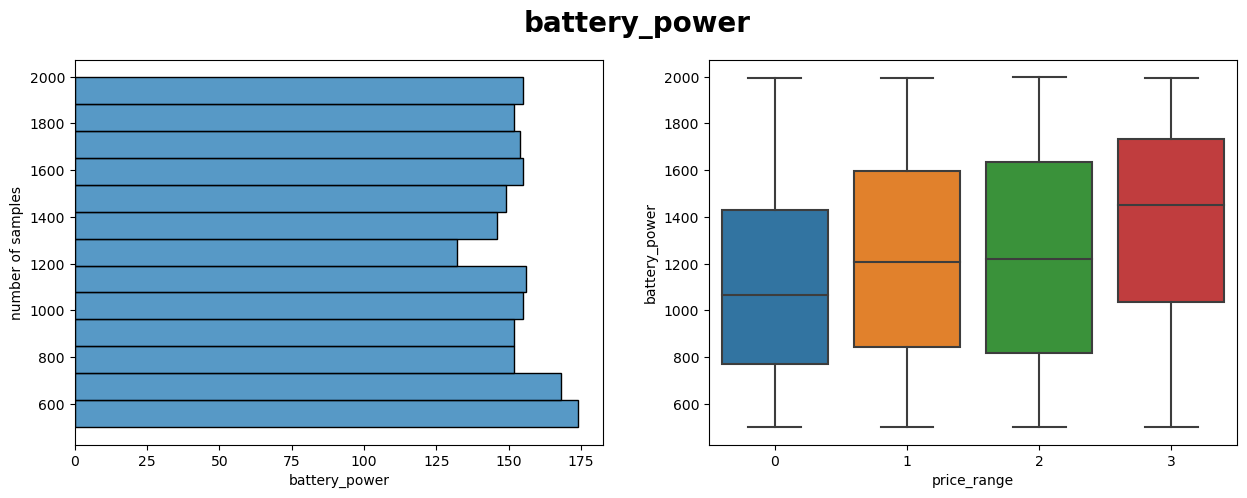

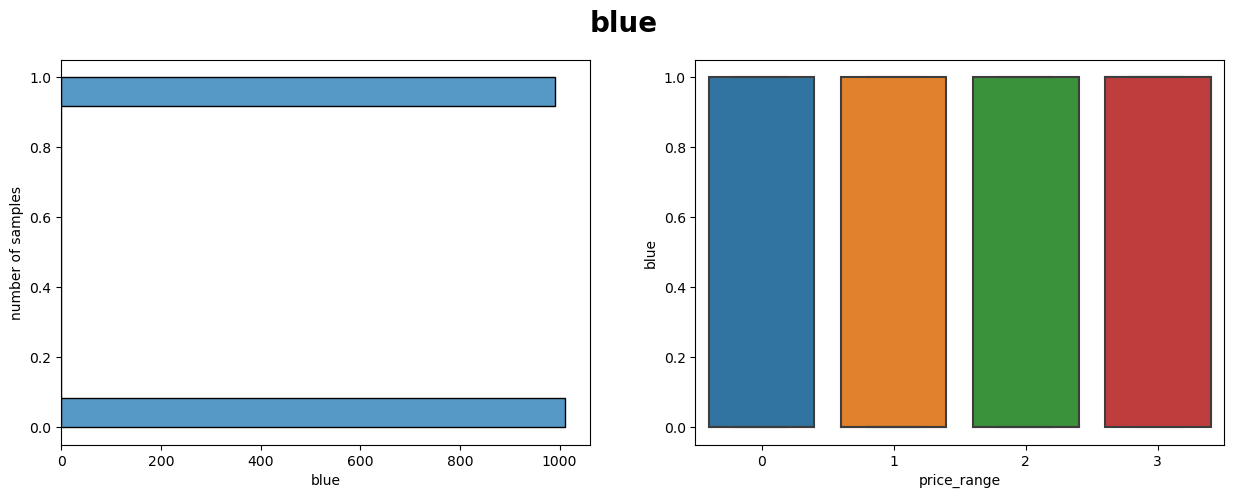

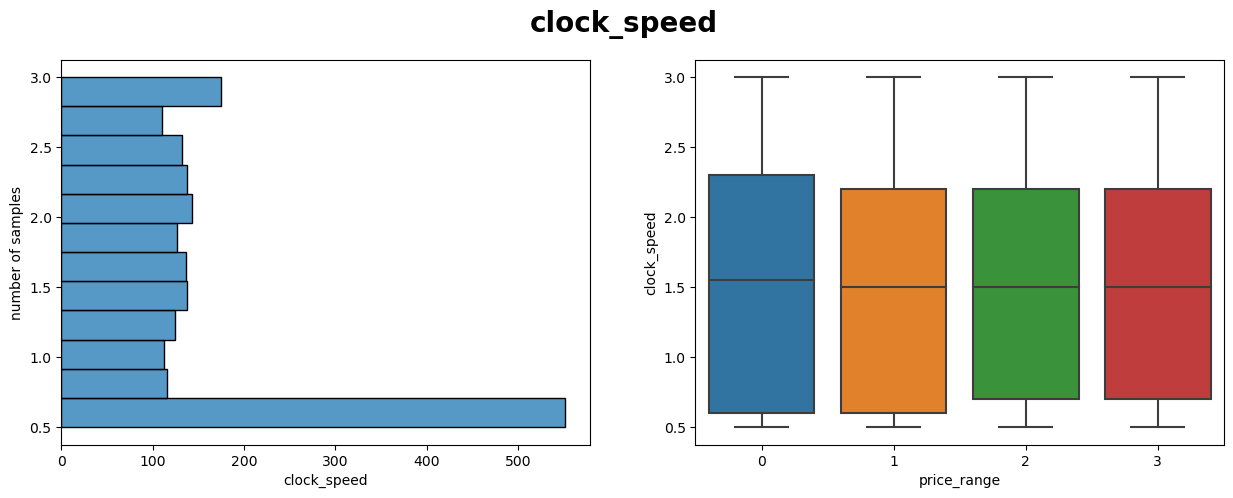

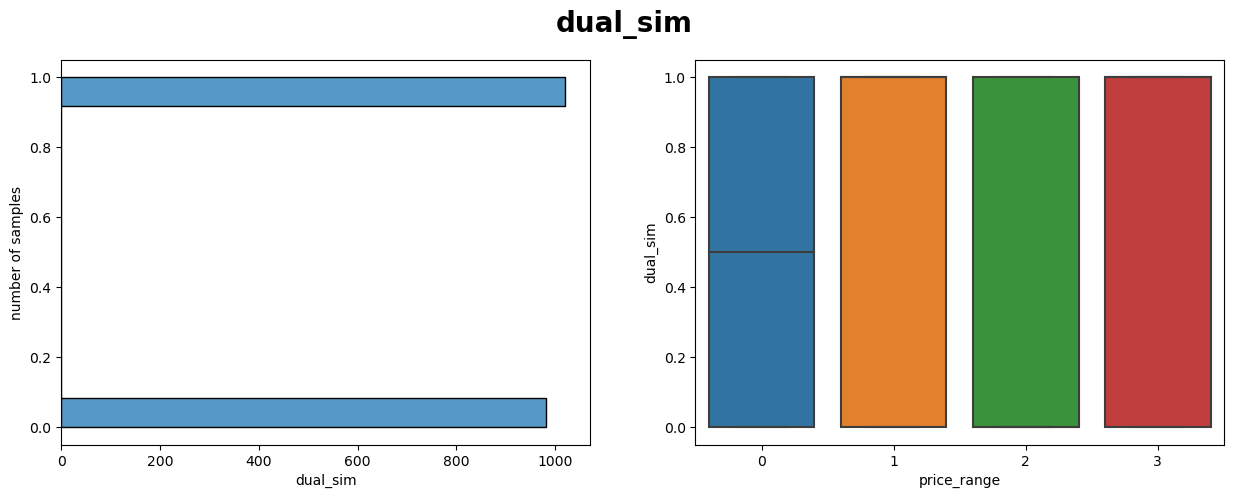

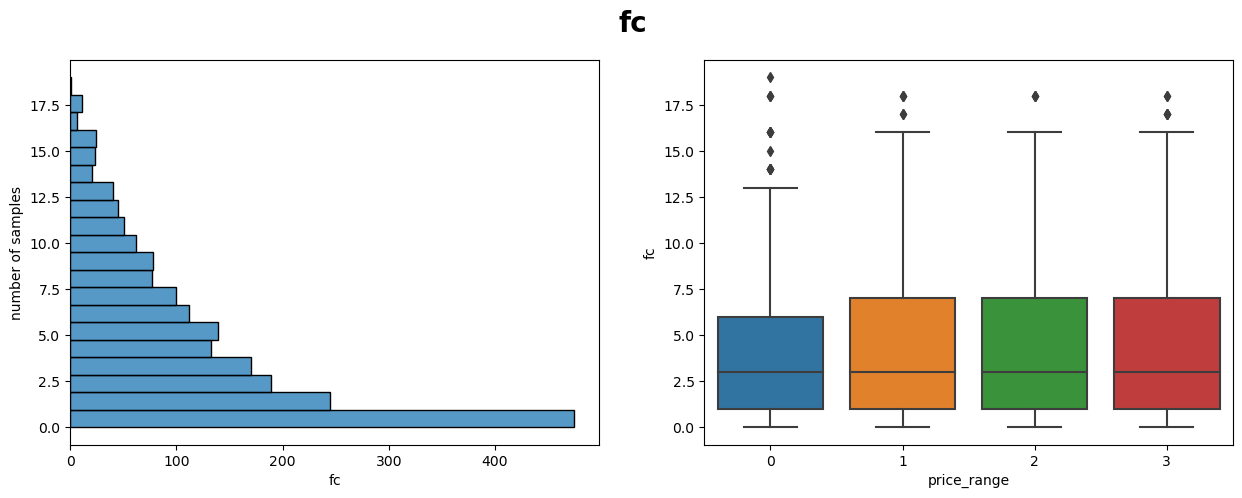

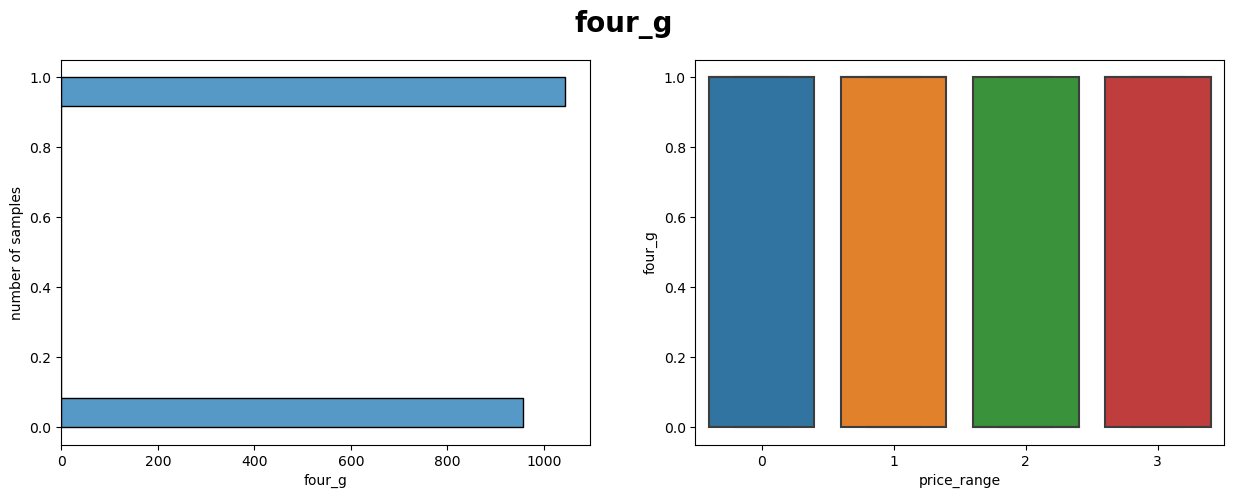

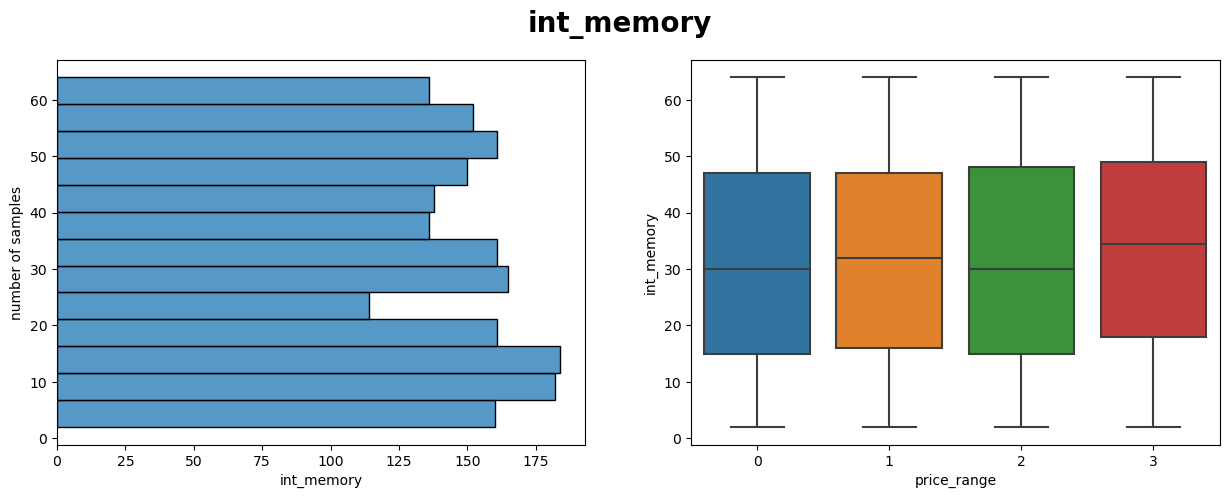

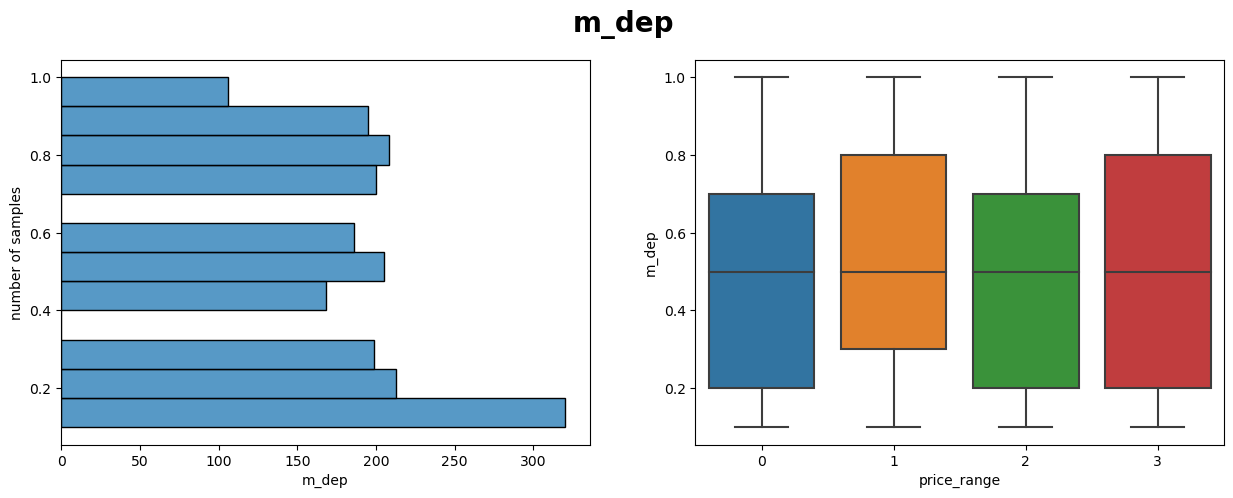

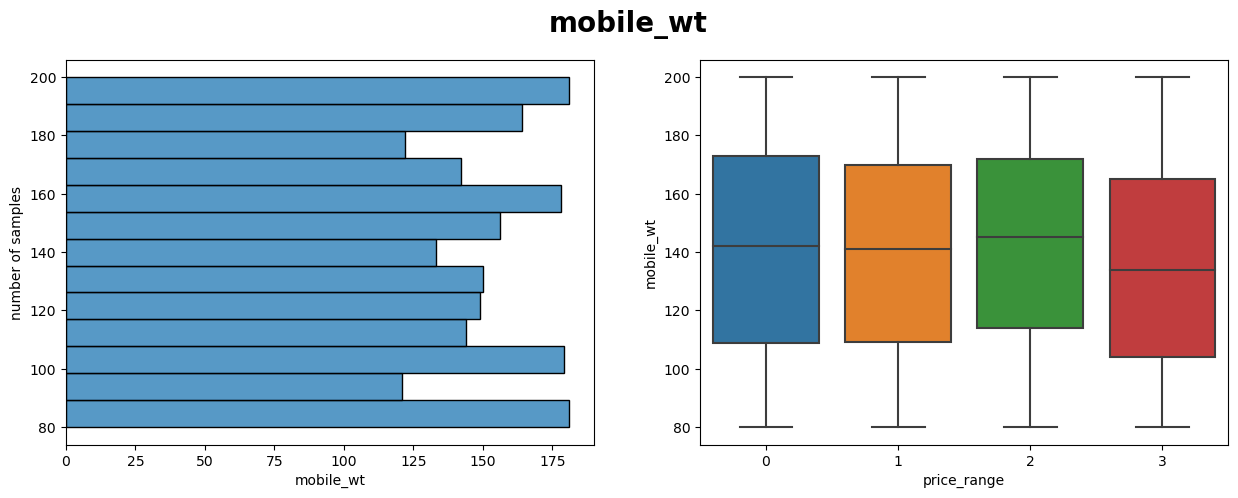

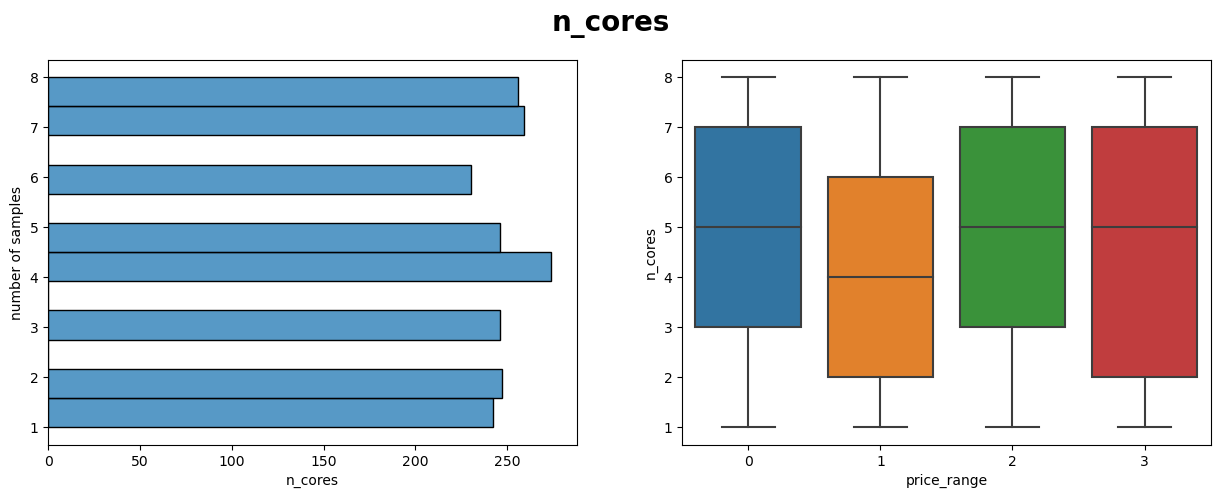

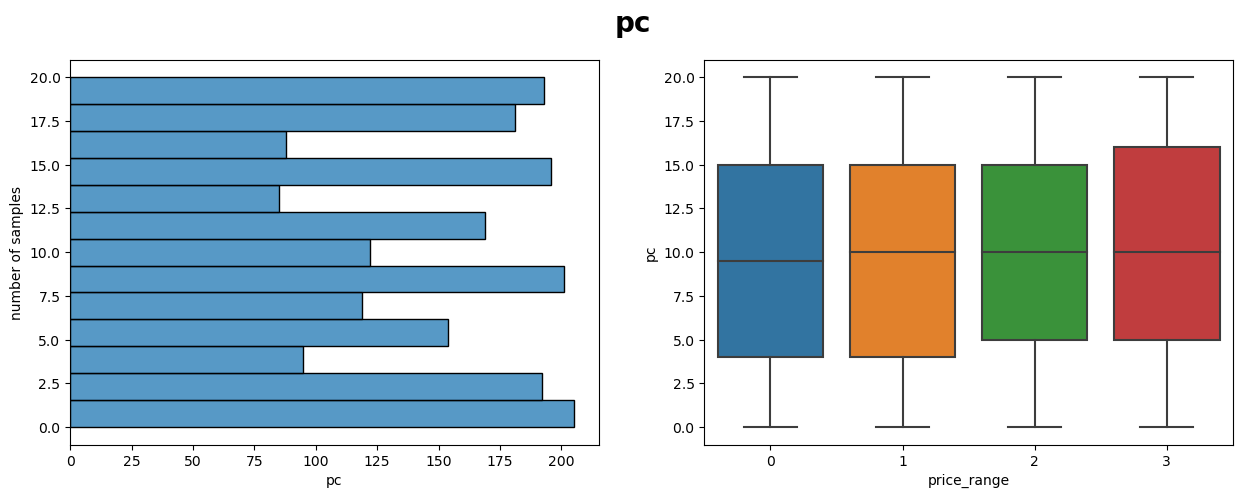

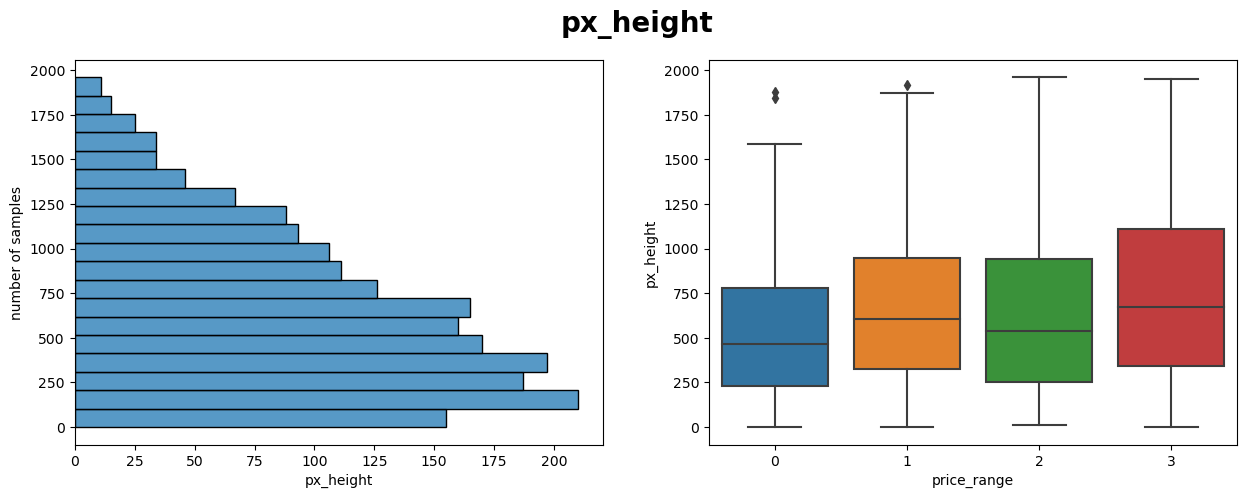

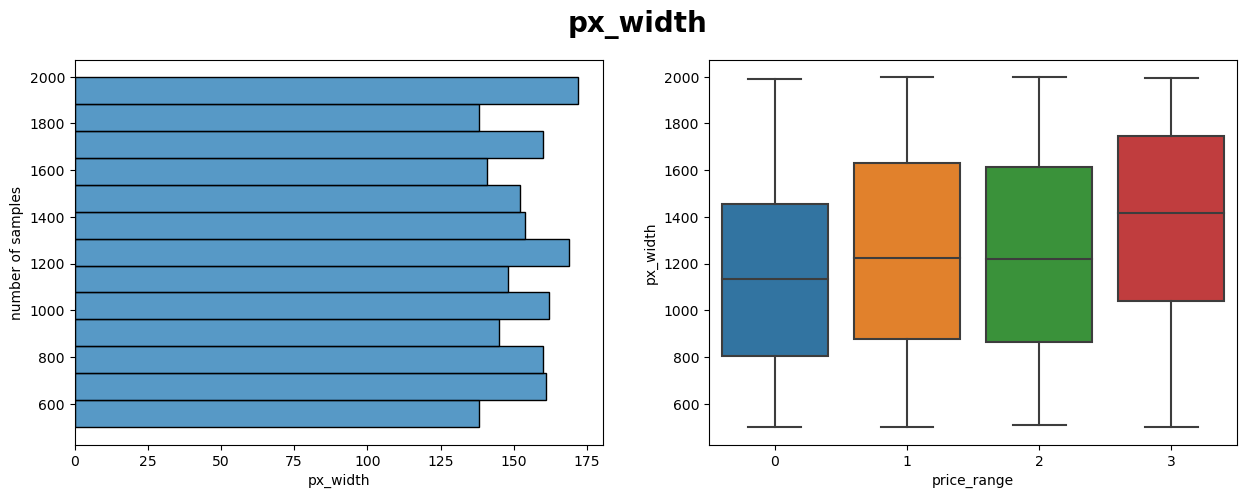

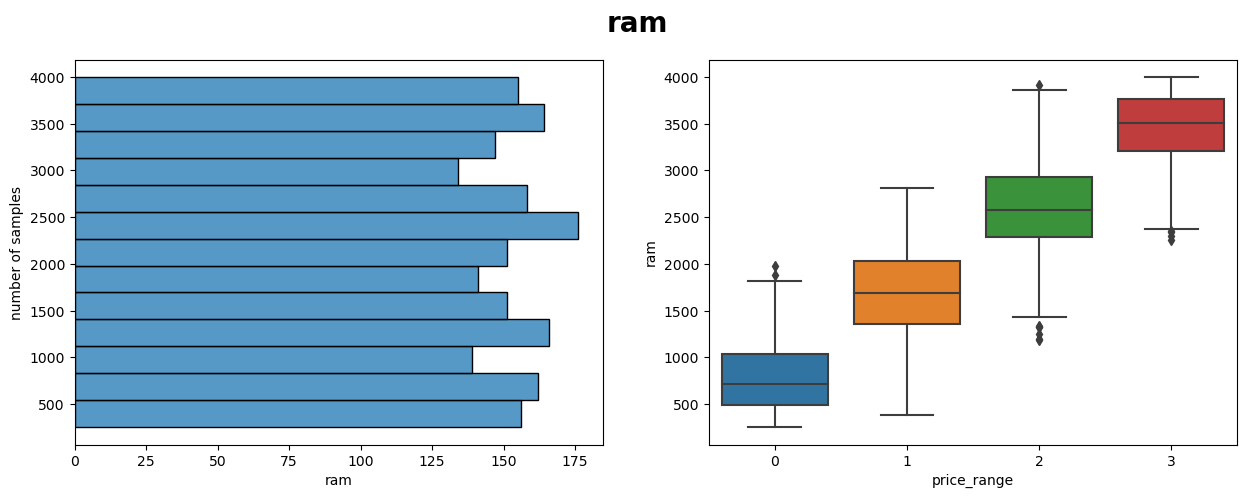

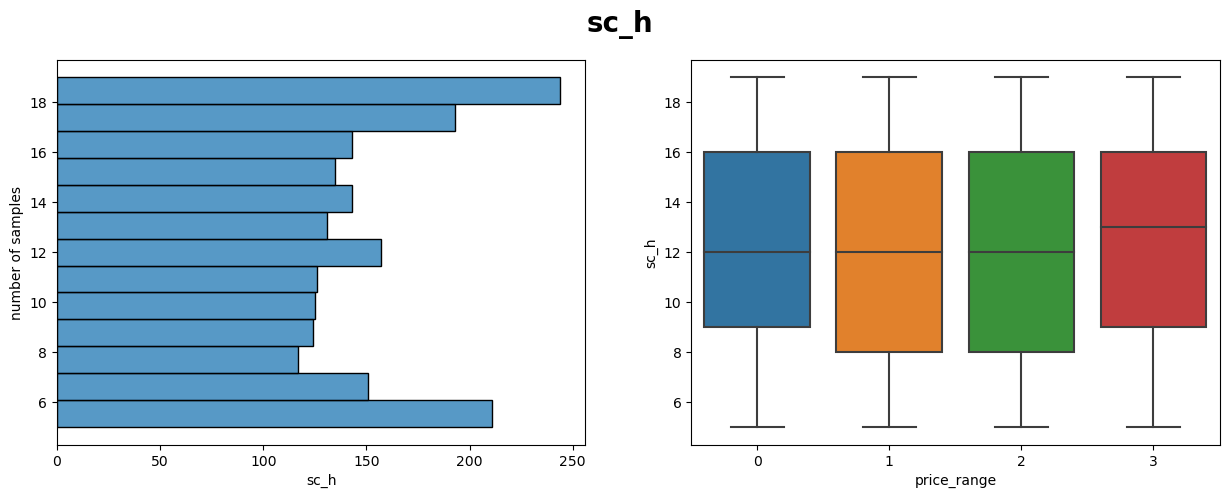

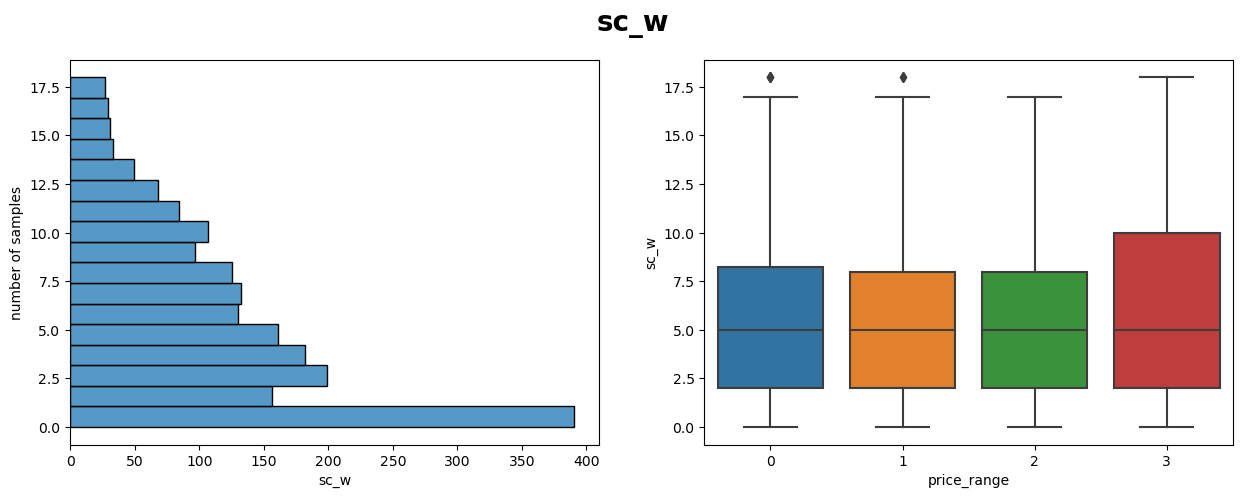

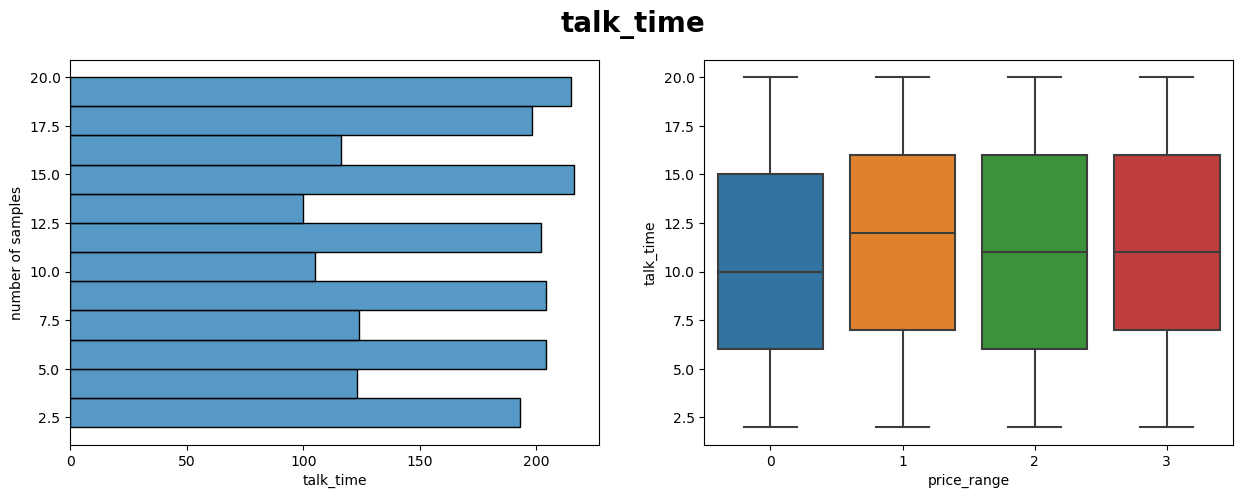

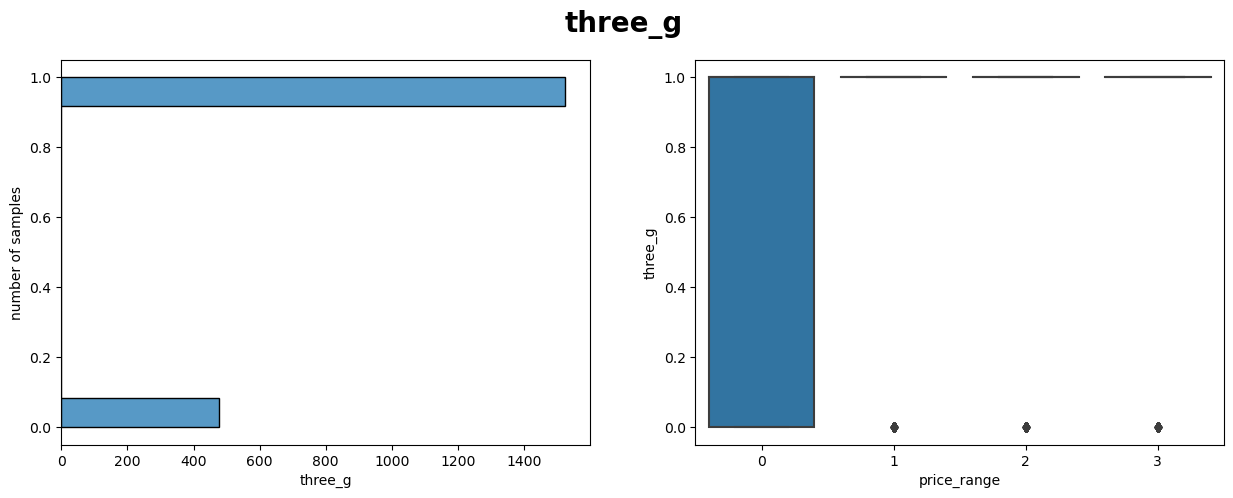

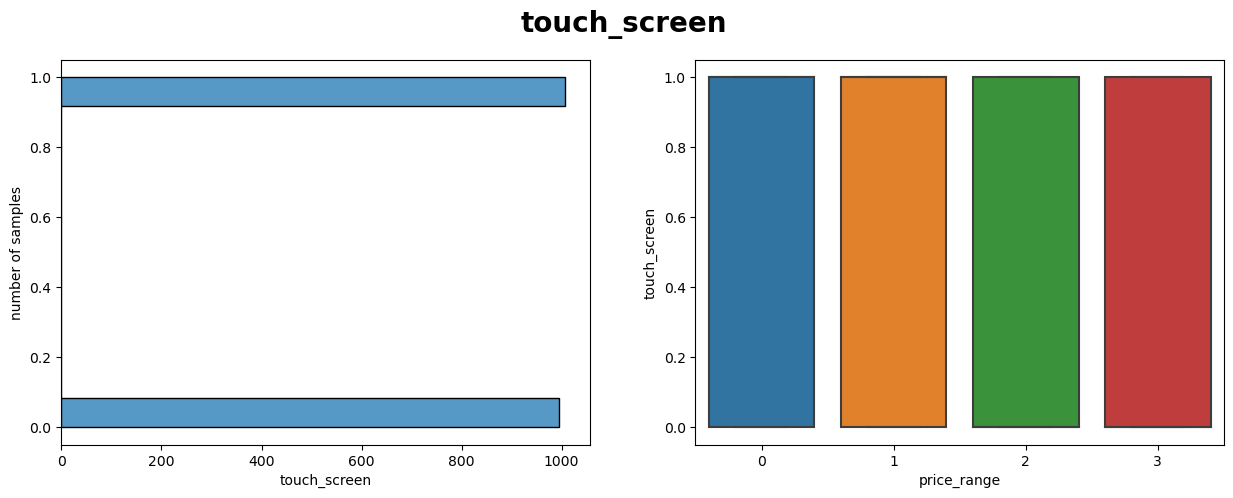

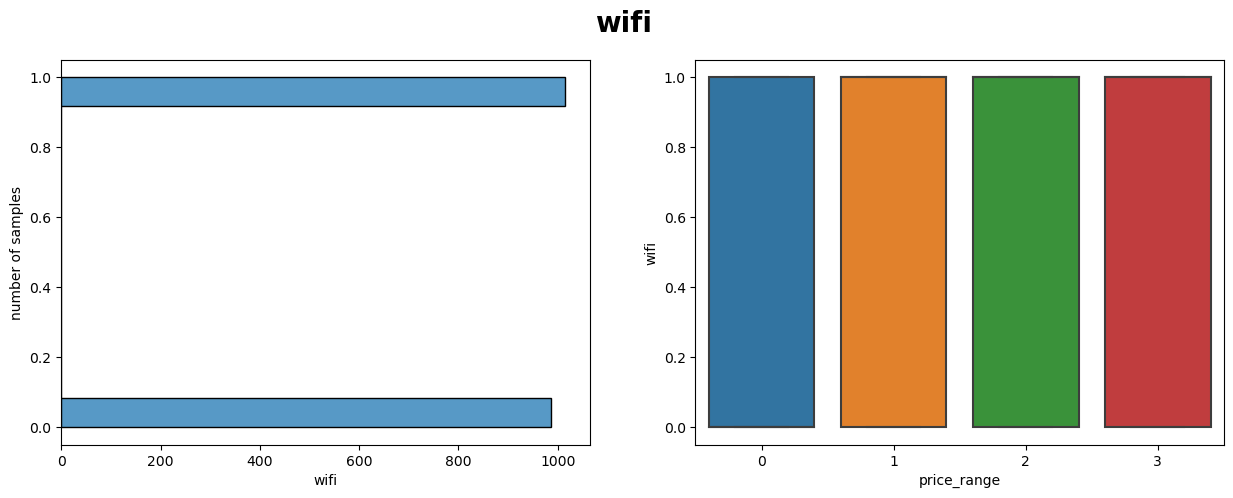

In [59]:
for col in df.columns[:-1] :
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(col, fontsize=20, fontweight='bold')
    # Left Ax
    ax0 = sns.histplot(y=col, data=df, ax=ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')
    # Right Ax
    ax1 = sns.boxplot(x='price_range', y=col, data=df, ax=ax[1])

col1) battery_power :
- battery_power is in range [501, 1998].  


col2) blue :
- bluetooth feature is binary feature.    
- 50.5% (1010) of samples dont have bluetooth.  
- 49.5% (990) of samples have bluetooth 


col3) clock_speed :
- Bluetooth feature is in range [0.5, 3].   
- The distribution of data in each price group is aproximatly similar. 
- Maximum number of samples (413 sapmples) with 0 value.  
- Minimum number of samples (28 sapmples) with 3.0 value.  
- Other samples with value in (0.5, 3) are in range [51, 85]</span> 


col4) dual_sim :
- Dual_sim feature is binary feature.  
- 49.1 % (981) of samples dont have dual sim.  
- 51.0 % (1019) of samples have dual sim.  </span> 


col5) front camera :
- Bluetooth feature is in range [0, 19].    
- The distribution of data in each price group is similar.  
- Most of data (474) have not front camera .
- The distribution goes downward.  
- The median of each price_range is about 3. </span> 


col6) 4G :
- 4g is a boolean feature.  
- 47.9 % (957) of samples had not 4G.  
- 52.1 % (1043) of samples had 4G.  </span> 


col7) internal memory :
- Interal memory feature is in range [2, 64].  
- The distribution of data in each price group is similar.  
- Most of data (47) have value of 27 . 
- All the samples in each price_range group, had normal contributions.</span> 


col8) mobile depth :
- Mobile depth feature is in range [0.1, 1].  
- The distribution of data in each price group is similar.  
- Most of data (320 samples) had value of 0.1 . 
- All the samples in each price_range group, had normal contributions.</span> 


col9) mobile weight :
- Mobile weight feature is in range [80, 200].   
- The distribution of data in each price group is similar.  
- Most of data (28 samples) had value of 183 .   
- All the samples in each price_range group, had normal distribution.</span> 


col10) number of CPU cores :
- Number of CPU cores feature is in range[1, 8].  
- Maximum frequency is 274 samples with 4 cores(13.7 %).  
- Minimum frequency is 230 samples with 6 cores(11.5 %).</span> 


col11 ) Main camera :
- Main camera feature is in range[1, 20].   
- Maximum frequency is 59 samples with value=5 .  
- Minimum frequency is 122 samples with 10 cores(6.1 %).</span> 


col12) Pixel height :
- Pixel resolution height feature is in range [0, 1960].   
- The distribution of data in each price group is similar.    
- All the samples in each price_range group, have normal contributions.</span> 


col13) Pixel width :
- Pixel resolution width feature is in range [500, 1998].   
- The distribution of data in each price group is similar.   
- All the samples in each price_range group, had normal distribution.</span> 


col14 ) RAM :
- RAM feature is in [256, 3998].    
- If ram in [256, 1974] ---> price_range=0 (500 samples).  
- If ram in [387, 2811] ---> price_range=1 (500 samples).  
- If ram in [1185, 3916] ---> price_range=2 (500 samples).  
- If ram in [2259, 3998] ---> price_range=3 (500 samples).   
- All the samples in each price_range group, have normal contributions.</span> 


col15) Screen height :
- Screen height feature is in range [5, 19].   
- Maximum frequency is 193 samples with value=17 (9.7%).  
- Minimum frequency is 97 samples with value=5 (4.9 %).   
- All the samples in each price_range group, had normal contributions.</span> 


col16) Screen width :
- Screen width feature is in range [0, 18].   
- Maximum frequency is 210 samples with value=1 (10.5 %).  
- Minimum frequency is 8 samples with value=18.   
- All the samples in each price_range group, had normal contributions.</span> 


col17) Talk time :
- Talk time feature is in range [2, 20].   
- Maximum frequency is 124 samples with value=7 (6.2 %).  
- Minimum frequency is 93 samples with value=5 (4.7 %).   
- All the samples in each price_range group, had normal distribution.</span> 



col18) 3G :
- 3G feature is a boolean feature.  
- 76.2 % of data (1523 samples) had 3G.  
- 23.8% of data (447 samples) had not 3G.  </span> 


col19) Touch screen :
- Touch screen feature is a boolean feature.   
- 50.3 % of data (1006 samples) had Touch screen.  
- 49.7 % of data (994 samples) had not Touch screen. </span>  


col20) wifi :
- wifi feature is a boolean feature.  
- 50.7 % of data (1014 samples) have Touch screen.  
- 49.3 % of data (986 samples) dont have Touch screen.  </span> 

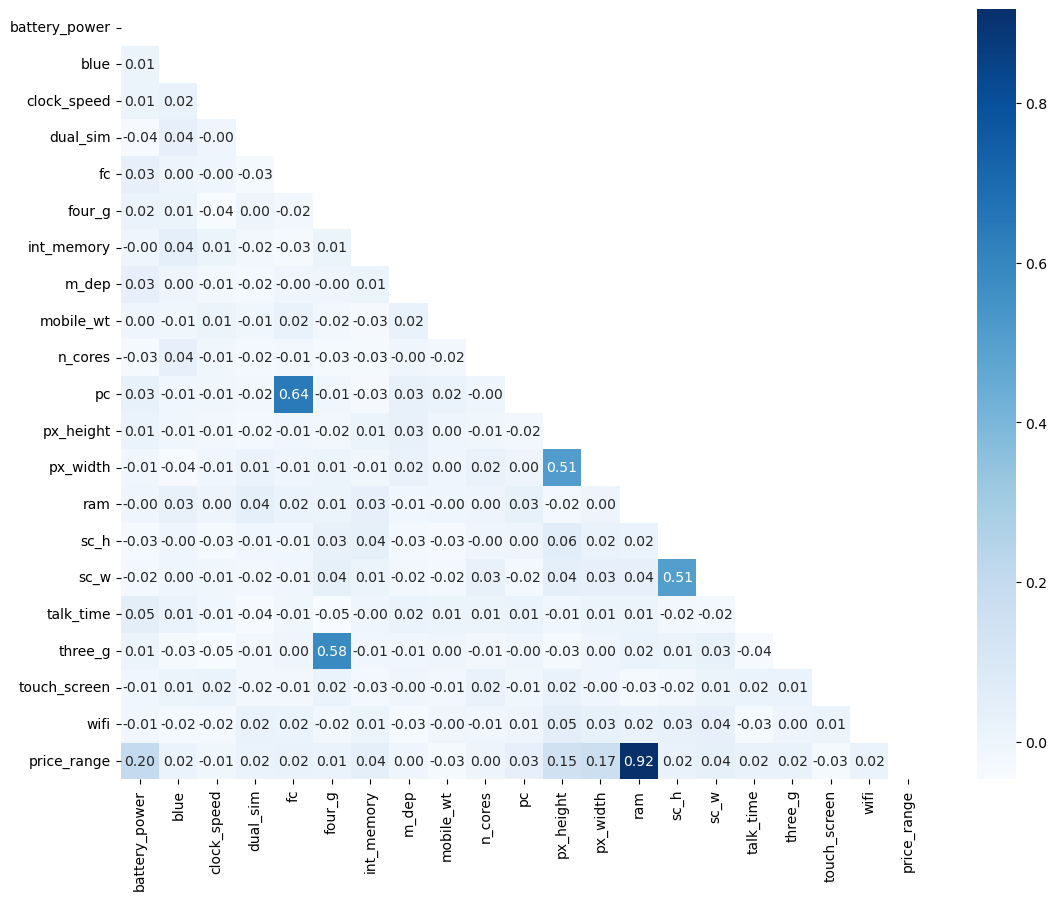

In [8]:
plt.figure(figsize=(13,10)) 
sns.heatmap(df.corr(),annot=True,fmt='.2f',mask=np.triu(df.corr()),cmap="Blues")
plt.show()

### Data Preprocessing

In [9]:
X_train=df.drop("price_range",axis=1)
Y_train=df["price_range"]

In [10]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [11]:
Y_train

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [14]:
#Normalizing the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train

array([[ 0.04111499,  1.02660376,  0.95560588, ...,  0.56291423,
         1.00626965, -1.0163842 ],
       [-0.34502603,  1.02660376,  1.68705354, ...,  0.56291423,
        -0.99376941, -1.0163842 ],
       [ 0.09079395,  1.02660376,  1.68705354, ...,  0.56291423,
         1.00626965,  0.98387991],
       ...,
       [-1.37473539,  1.02660376,  0.10225029, ...,  0.56291423,
        -0.99376941, -1.0163842 ],
       [-1.2708612 ,  1.02660376,  0.46797411, ...,  0.56291423,
        -0.99376941,  0.98387991],
       [-1.24602172,  1.02660376, -0.75110531, ...,  0.56291423,
         1.00626965,  0.98387991]])

In [15]:
# Splitting the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.20,random_state=3) 

### Models

### Random Forest

In [16]:
rf_model=RandomForestClassifier(max_depth=None,random_state=42)
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [17]:
# model evaluation
rf_eval=accuracy_score(y_test,rf_pred)
rf_eval

0.885

### Decision Tree

In [45]:
dt_model=DecisionTreeClassifier(max_depth=None,random_state=42)
dt_model.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

In [46]:
# model evaluation
dt_eval=accuracy_score(y_test,dt_pred)
dt_eval

0.825

### Extreme Gradient Boost(XGB)

In [48]:
xgb_model= XGBClassifier(max_depth=None,random_state=42)
xgb_model.fit(x_train,y_train)
xgb_model_pred=xgb_model.predict(x_test) 

In [53]:
# model evaluation
xgb_eval=accuracy_score(y_test,xgb_model_pred)
xgb_eval

0.905

In [55]:

model_ev = pd.DataFrame({'Model': ['Random Forest',
                    'Decision Tree','XGBo0st'], 'Accuracy': [rf_eval*100,
                    dt_eval*100,xgb_eval*100]})
model_ev

,Model,Accuracy
0,Random Forest,88.5
1,Decision Tree,82.5
2,XGBo0st,90.5


<BarContainer object of 3 artists>

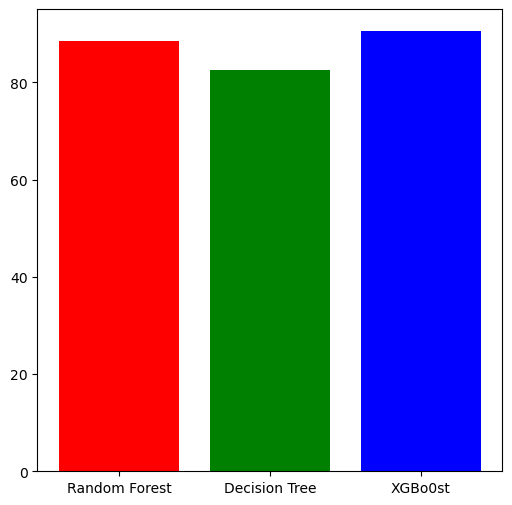

In [56]:
colors=['red','green','blue']
plt.figure(figsize=(6,6))
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)